# HW 2, Financial Econometrics, Nick Popov, Maria Koldasheva

### Libraries downloading

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from statistics import mean, sqrt, stdev, variance

from scipy.special import logsumexp

### Data downloading

#### Data Companies

In [2]:
data = pd.read_excel('C:/Users/Kolya/Documents/New_studies/Quantitative Finance/Data for use/SP_500_monthly.xlsx') 

In [3]:
data

,Name,Company Common Name,GICS Sector Name,GICS Industry Group Name,Fiscal Year End Date,Price Close,Price Close.1,Price Close.2,Price Close.3,Price Close.4,...,Price Close.590,Price Close.591,Price Close.592,Price Close.593,Price Close.594,Price Close.595,Price Close.596,Price Close.597,Price Close.598,Price Close.599
0,NaN,NaN,NaN,NaN,NaT,1971-07-31 00:00:00,1971-08-31 00:00:00,1971-09-30 00:00:00,1971-10-31 00:00:00,1971-11-30 00:00:00,...,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00
1,MMM.N,3M Co,Industrials,Capital Goods,2021-12-31,NaN,NaN,NaN,NaN,NaN,...,160.18,159.96,172.73,174.79,175.66,175.06,192.68,197.14,203.04,198.63
2,AOS.N,A O Smith Corp,Industrials,Capital Goods,2021-12-31,NaN,NaN,NaN,NaN,NaN,...,52.8,51.69,56.31,54.82,54.3,59.37,67.61,67.75,71.07,72.06
3,ABT.N,Abbott Laboratories,Health Care,Health Care Equipment & Services,2021-12-31,NaN,NaN,NaN,NaN,NaN,...,108.83,105.11,108.22,109.49,123.59,119.78,119.84,120.08,116.65,115.93
4,ABBV.N,Abbvie Inc,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",2021-12-31,NaN,NaN,NaN,NaN,NaN,...,87.59,85.1,104.58,107.15,102.48,107.74,108.22,111.5,113.2,112.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaT,1971-07-31 00:00:00,1971-08-31 00:00:00,1971-09-30 00:00:00,1971-10-31 00:00:00,1971-11-30 00:00:00,...,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00
508,SP500 индекс (finance.yahoo.com),NaN,NaN,NaN,NaT,95.580002,99.029999,98.339996,94.230003,93.989998,...,3363,3269.959961,3621.629883,3756.07,3714.24,3811.15,3972.89,4181.17,4204.11,4297.5
509,UST 10Y % в год (Shiller database),NaN,NaN,NaN,NaT,6.73,6.58,6.14,5.93,5.81,...,0.68,0.79,0.87,0.93,1.08,1.26,1.61,1.64,1.62,1.52


In [4]:
data['Price Close.118']

0      1981-05-31 00:00:00
1                  7.03125
2                      NaN
3                 0.779724
4                      NaN
              ...         
506                    NaN
507    1981-05-31 00:00:00
508             132.589996
509                   14.1
510                    NaN
Name: Price Close.118, Length: 511, dtype: object

#### Data Prices

In [5]:
data_price = pd.read_excel('C:/Users/Kolya/Documents/New_studies/Quantitative Finance/Data for use/CPIAUCSL.xls')

In [6]:
data_price = data_price.rename(columns={'Unnamed: 1': 'Price', 'FRED Graph Observations': 'TIME_PERIOD'})

In [7]:
data_price

,TIME_PERIOD,Price
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
...,...,...
915,2022-06-01 00:00:00,295.328
916,2022-07-01 00:00:00,295.271
917,2022-08-01 00:00:00,295.62
918,2022-09-01 00:00:00,296.761


### Data formating

In [8]:
# count_row = df.shape[0]  # Gives number of rows
# count_col = df.shape[1]  # Gives number of columns

In [9]:
data_price_use = data_price.copy().iloc[410:data_price.shape[0]]

In [10]:
data_price_use

,TIME_PERIOD,Price
410,1980-05-01 00:00:00,81.7
411,1980-06-01 00:00:00,82.5
412,1980-07-01 00:00:00,82.6
413,1980-08-01 00:00:00,83.2
414,1980-09-01 00:00:00,83.9
...,...,...
915,2022-06-01 00:00:00,295.328
916,2022-07-01 00:00:00,295.271
917,2022-08-01 00:00:00,295.62
918,2022-09-01 00:00:00,296.761


Function for data extraction

In [11]:
START_DATE = pd.to_datetime('1981-05')
END_DATE = pd.to_datetime('2021-06')

def extract_data(df, start_date=START_DATE, end_date=END_DATE):
    df = df[['TIME_PERIOD', 'Price']].copy()
    df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])
    return df[(df['TIME_PERIOD'] >= START_DATE) & (df['TIME_PERIOD'] <= END_DATE)]

data_price_use = extract_data(data_price_use)

# # Shift beginning of quarter to quarter end:
# df_gdp['TIME_PERIOD'] = df_gdp['TIME_PERIOD'] + pd.offsets.QuarterEnd()
# df_ipi['TIME_PERIOD'] = df_ipi['TIME_PERIOD'] + pd.offsets.QuarterEnd()

In [12]:
data_price_use['Price'] = data_price_use['Price'].astype(float)
data_price_use

,TIME_PERIOD,Price
422,1981-05-01,89.700
423,1981-06-01,90.500
424,1981-07-01,91.500
425,1981-08-01,92.200
426,1981-09-01,93.100
...,...,...
899,2021-02-01,263.346
900,2021-03-01,265.028
901,2021-04-01,266.727
902,2021-05-01,268.599


Convert to quarterly

In [13]:
# def to_quarterly(df):
#     df.set_index('TIME_PERIOD', inplace=True)
#     df = df.resample('Q').mean()
#     df.reset_index(inplace=True)
#     return df

# data_price_use = to_quarterly(data_price_use)

In [14]:
# Selecting 7 companies for the analysis
options = ['F.N', 'GM.N', 'GE.N', 'XOM.N', 'MRO.N', 'KO.N', 'BA.N']
data_branches_7 = data.loc[data['Name'].isin(options)]

Deleting all columns with all NaN

In [15]:
data_branches_7 = data_branches_7.dropna(axis = 1, how = 'all')

Export to excel

In [16]:
data_branches_7_ex = data_branches_7.copy().transpose()
data_branches_7_ex.to_excel('C:/Users/Kolya/Documents/New_studies/Quantitative Finance/HW/2/dataset.xlsx')

In [17]:
data_branches_7.dtypes

Name                                object
Company Common Name                 object
GICS Sector Name                    object
GICS Industry Group Name            object
Fiscal Year End Date        datetime64[ns]
                                 ...      
Price Close.595                     object
Price Close.596                     object
Price Close.597                     object
Price Close.598                     object
Price Close.599                     object
Length: 487, dtype: object

In [18]:
data_branches_7 = data_branches_7.iloc[0:7]

In [19]:
data_branches_7_log = data_branches_7.iloc[:, 5:len(data_branches_7.columns)]

In [20]:
data_branches_7_log = data_branches_7_log.apply(lambda column: column.astype(float), axis=1)

In [21]:
data_branches_7_log = data_branches_7_log.apply(lambda column: np.log(column), axis=1)

In [22]:
data_branches_7_log = data_branches_7_log.fillna(0)
data_branches_7_log = data_branches_7_log#.reset_index(drop=True, inplace=True)

In [23]:
data_branches_7_log

,Price Close.118,Price Close.119,Price Close.120,Price Close.121,Price Close.122,Price Close.123,Price Close.124,Price Close.125,Price Close.126,Price Close.127,...,Price Close.590,Price Close.591,Price Close.592,Price Close.593,Price Close.594,Price Close.595,Price Close.596,Price Close.597,Price Close.598,Price Close.599
71,1.571727,1.512273,1.409142,1.225994,1.273705,1.348476,1.220545,1.204016,1.158463,1.021544,...,5.107520,4.972518,5.350483,5.366256,5.268837,5.356633,5.540165,5.456645,5.509469,5.478804
117,-0.250224,-0.322962,-0.344780,-0.382175,-0.352219,-0.267061,-0.294537,-0.322962,-0.382176,-0.461637,...,3.899343,3.872450,3.943522,4.004420,3.874321,3.891616,3.964805,3.988614,4.012592,3.991019
186,1.396059,1.454245,1.468738,1.405668,1.350538,1.334211,1.413301,1.358602,1.346448,1.279196,...,3.536020,3.484926,3.641001,3.718924,3.803101,3.995813,4.022311,4.047253,4.066802,4.144404
199,0.368475,0.405897,0.306924,0.209785,0.228863,0.013538,0.044069,0.051618,0.144136,0.183978,...,1.896119,2.045109,2.206074,2.173615,2.354228,2.459589,2.505526,2.445819,2.676215,2.698673
212,0.277053,0.214412,0.200153,0.112414,0.094355,0.082919,0.187815,0.143288,0.226492,0.232414,...,1.829376,2.004179,2.320425,2.379546,2.368373,2.528924,2.574900,2.574138,2.643334,2.599722
214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.387436,3.541829,3.780547,3.729061,3.925531,3.938275,4.051089,4.046903,4.082778,4.080415
297,2.114030,2.017956,2.067146,1.957331,1.892793,1.957331,2.005271,2.022149,1.892793,1.838990,...,1.408545,1.376244,1.778336,1.897620,1.979621,2.406945,2.368373,2.421257,2.494032,2.611539


In [24]:
data_branches_7_log = data_branches_7_log.transpose()

In [25]:
data_branches_7_log.reset_index(drop=True, inplace=True)

In [26]:
data_branches_7_log

,71,117,186,199,212,214,297
0,1.571727,-0.250224,1.396059,0.368475,0.277053,0.000000,2.114030
1,1.512273,-0.322962,1.454245,0.405897,0.214412,0.000000,2.017956
2,1.409142,-0.344780,1.468738,0.306924,0.200153,0.000000,2.067146
3,1.225994,-0.382175,1.405668,0.209785,0.112414,0.000000,1.957331
4,1.273705,-0.352219,1.350538,0.228863,0.094355,0.000000,1.892793
...,...,...,...,...,...,...,...
477,5.356633,3.891616,3.995813,2.459589,2.528924,3.938275,2.406945
478,5.540165,3.964805,4.022311,2.505526,2.574900,4.051089,2.368373
479,5.456645,3.988614,4.047253,2.445819,2.574138,4.046903,2.421257
480,5.509469,4.012592,4.066802,2.676215,2.643334,4.082778,2.494032


In [27]:
data_price_use = data_price_use.reset_index(drop=True)

In [28]:
data_price_use

,TIME_PERIOD,Price
0,1981-05-01,89.700
1,1981-06-01,90.500
2,1981-07-01,91.500
3,1981-08-01,92.200
4,1981-09-01,93.100
...,...,...
477,2021-02-01,263.346
478,2021-03-01,265.028
479,2021-04-01,266.727
480,2021-05-01,268.599


### Creating untified dataset

In [29]:
data_branches_7_log['prices'] = np.log(data_price_use['Price'])

In [30]:
data_branches_7_log

,71,117,186,199,212,214,297,prices
0,1.571727,-0.250224,1.396059,0.368475,0.277053,0.000000,2.114030,4.496471
1,1.512273,-0.322962,1.454245,0.405897,0.214412,0.000000,2.017956,4.505350
2,1.409142,-0.344780,1.468738,0.306924,0.200153,0.000000,2.067146,4.516339
3,1.225994,-0.382175,1.405668,0.209785,0.112414,0.000000,1.957331,4.523960
4,1.273705,-0.352219,1.350538,0.228863,0.094355,0.000000,1.892793,4.533674
...,...,...,...,...,...,...,...,...
477,5.356633,3.891616,3.995813,2.459589,2.528924,3.938275,2.406945,5.573469
478,5.540165,3.964805,4.022311,2.505526,2.574900,4.051089,2.368373,5.579835
479,5.456645,3.988614,4.047253,2.445819,2.574138,4.046903,2.421257,5.586226
480,5.509469,4.012592,4.066802,2.676215,2.643334,4.082778,2.494032,5.593220


## Adjusting to CPI

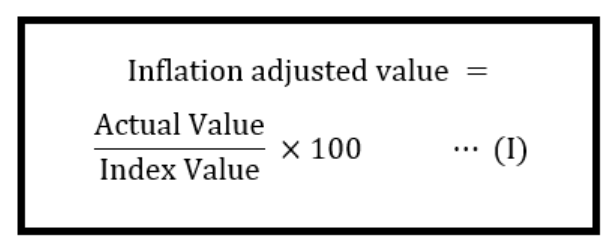

In [31]:
#illustration
from IPython.display import Image
Image("C:/Users/Kolya/Documents/New_studies/Quantitative Finance/HW/2/Adjusted.png")

In [32]:
data_branches_7_log_adj = data_branches_7_log.copy()

In [33]:
for i in data_branches_7_log_adj.columns:
    data_branches_7_log_adj[i] = data_branches_7_log_adj[i]/data_branches_7_log_adj['prices']

In [34]:
data_branches_7_log_adj

,71,117,186,199,212,214,297,prices
0,0.349547,-0.055649,0.310479,0.081948,0.061616,0.000000,0.470153,1.0
1,0.335662,-0.071684,0.322782,0.090092,0.047590,0.000000,0.447902,1.0
2,0.312010,-0.076341,0.325205,0.067959,0.044318,0.000000,0.457704,1.0
3,0.271000,-0.084478,0.310716,0.046372,0.024849,0.000000,0.432659,1.0
4,0.280943,-0.077690,0.297890,0.050481,0.020812,0.000000,0.417496,1.0
...,...,...,...,...,...,...,...,...
477,0.961095,0.698240,0.716935,0.441303,0.453743,0.706611,0.431858,1.0
478,0.992890,0.710560,0.720866,0.449032,0.461465,0.726023,0.424452,1.0
479,0.976804,0.714009,0.724506,0.437830,0.460801,0.724443,0.433433,1.0
480,0.985026,0.717403,0.727095,0.478475,0.472596,0.729951,0.445903,1.0


In [35]:
data_branches_7_log_adj.to_excel('C:/Users/Kolya/Documents/New_studies/Quantitative Finance/HW/2/dataset_adj.xlsx')

## Fama-French 

In [36]:
f_data = pd.read_excel('C:/Users/Kolya/Documents/New_studies/Quantitative Finance/Data for use/F_F.xlsx') 

In [37]:
f_data_raw = f_data.drop(f_data.columns[0], axis=1)

Growth rate.

$r=ln\left(1 + \frac{value}{100}\right)$

In [38]:
f_data_raw = f_data_raw.apply(lambda column: np.log(1 + (column)/100), axis=1)
f_data_raw['date'] = f_data.iloc[:, 0]
f_data_raw[(f_data_raw['date'] == 198105) | (f_data_raw['date'] == 202106)]

,Mkt-RF,SMB,HML,RMW,CMA,RF,date
214,0.001099,0.024205,-0.004209,0.002996,-0.015418,0.011434,198105
695,0.027129,-0.003406,-0.081427,-0.022041,-0.009545,0.000000,202106


In [39]:
f_data_raw = f_data_raw.iloc[214:696]
f_data_raw = f_data_raw.reset_index(drop=True)
f_data_raw

,Mkt-RF,SMB,HML,RMW,CMA,RF,date
0,0.001099,0.024205,-0.004209,0.002996,-0.015418,0.011434,198105
1,-0.023883,-0.009646,0.050027,-0.013795,0.026252,0.013410,198106
2,-0.015520,-0.020713,-0.005013,0.012521,-0.025728,0.012324,198107
3,-0.073001,-0.018266,0.046502,-0.003205,0.014002,0.012719,198108
4,-0.074400,-0.024805,0.050408,0.000800,0.025960,0.012324,198109
...,...,...,...,...,...,...,...
477,0.027421,0.044304,0.069339,0.002996,-0.019591,0.000000,202102
478,0.030335,-0.008637,0.071390,0.062599,0.033531,0.000000,202103
479,0.048123,-0.032007,-0.009444,0.024497,-0.027268,0.000000,202104
480,0.002896,0.012225,0.068406,0.024985,0.029656,0.000000,202105


In [40]:
Data_ols = pd.merge(data_branches_7_log_adj, f_data_raw, left_index=True, right_index=True)
Data_ols = Data_ols.drop(Data_ols.columns[7], axis=1)
Data_ols = Data_ols.rename(columns={71:'BA', 117:'KO', 186:'XOM', 199:'F',
                 212:'GE', 214:'GM', 297:'MRO', 'Mkt-RF':'Mkt'})
Data_ols

,BA,KO,XOM,F,GE,GM,MRO,Mkt,SMB,HML,RMW,CMA,RF,date
0,0.349547,-0.055649,0.310479,0.081948,0.061616,0.000000,0.470153,0.001099,0.024205,-0.004209,0.002996,-0.015418,0.011434,198105
1,0.335662,-0.071684,0.322782,0.090092,0.047590,0.000000,0.447902,-0.023883,-0.009646,0.050027,-0.013795,0.026252,0.013410,198106
2,0.312010,-0.076341,0.325205,0.067959,0.044318,0.000000,0.457704,-0.015520,-0.020713,-0.005013,0.012521,-0.025728,0.012324,198107
3,0.271000,-0.084478,0.310716,0.046372,0.024849,0.000000,0.432659,-0.073001,-0.018266,0.046502,-0.003205,0.014002,0.012719,198108
4,0.280943,-0.077690,0.297890,0.050481,0.020812,0.000000,0.417496,-0.074400,-0.024805,0.050408,0.000800,0.025960,0.012324,198109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0.961095,0.698240,0.716935,0.441303,0.453743,0.706611,0.431858,0.027421,0.044304,0.069339,0.002996,-0.019591,0.000000,202102
478,0.992890,0.710560,0.720866,0.449032,0.461465,0.726023,0.424452,0.030335,-0.008637,0.071390,0.062599,0.033531,0.000000,202103
479,0.976804,0.714009,0.724506,0.437830,0.460801,0.724443,0.433433,0.048123,-0.032007,-0.009444,0.024497,-0.027268,0.000000,202104
480,0.985026,0.717403,0.727095,0.478475,0.472596,0.729951,0.445903,0.002896,0.012225,0.068406,0.024985,0.029656,0.000000,202105


### OLS

In [41]:
import statsmodels.formula.api as smf

$r_e - r_0 = \alpha + (r_m + r_0)\beta_1 + SMB\beta_2 + HML\beta_3 + RMW\beta_4 + CMA\beta_5$

In [42]:
Firms = Data_ols.columns[0:7]
Firms

Index(['BA', 'KO', 'XOM', 'F', 'GE', 'GM', 'MRO'], dtype='object')

In [43]:
OlS_results = {}
for firm in Firms:
    OlS_results.update({firm: smf.ols(formula='Mkt ~ RF + '
                                      + str(firm) + ' +SMB + HML + RMW + CMA',
                                      data=Data_ols, cov_type = 'HC3').fit()})
    print(smf.ols(formula='Mkt ~ RF + '
                                      + str(firm) + ' +SMB + HML + RMW + CMA',
                                      data=Data_ols, cov_type = 'HC3').fit().summary())

C:\Users\Kolya\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)
C:\Users\Kolya\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)
C:\Users\Kolya\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)
C:\Users\Kolya\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)
C:\Users\Kolya\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)
C:\Users\Kolya\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)
C:\Users\Kolya\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknow

                            OLS Regression Results                            
Dep. Variable:                    Mkt   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     22.85
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.02e-23
Time:                        18:46:35   Log-Likelihood:                 870.04
No. Observations:                 482   AIC:                            -1726.
Df Residuals:                     475   BIC:                            -1697.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0128      0.013      0.954      0.3

C:\Users\Kolya\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)
C:\Users\Kolya\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)


F-test: coefficients jointly equal zero (the null hypothesis)

# Attempts to calculate Corrected VR(q)-test: RW(1)

Unsuccessful, unfortunately.

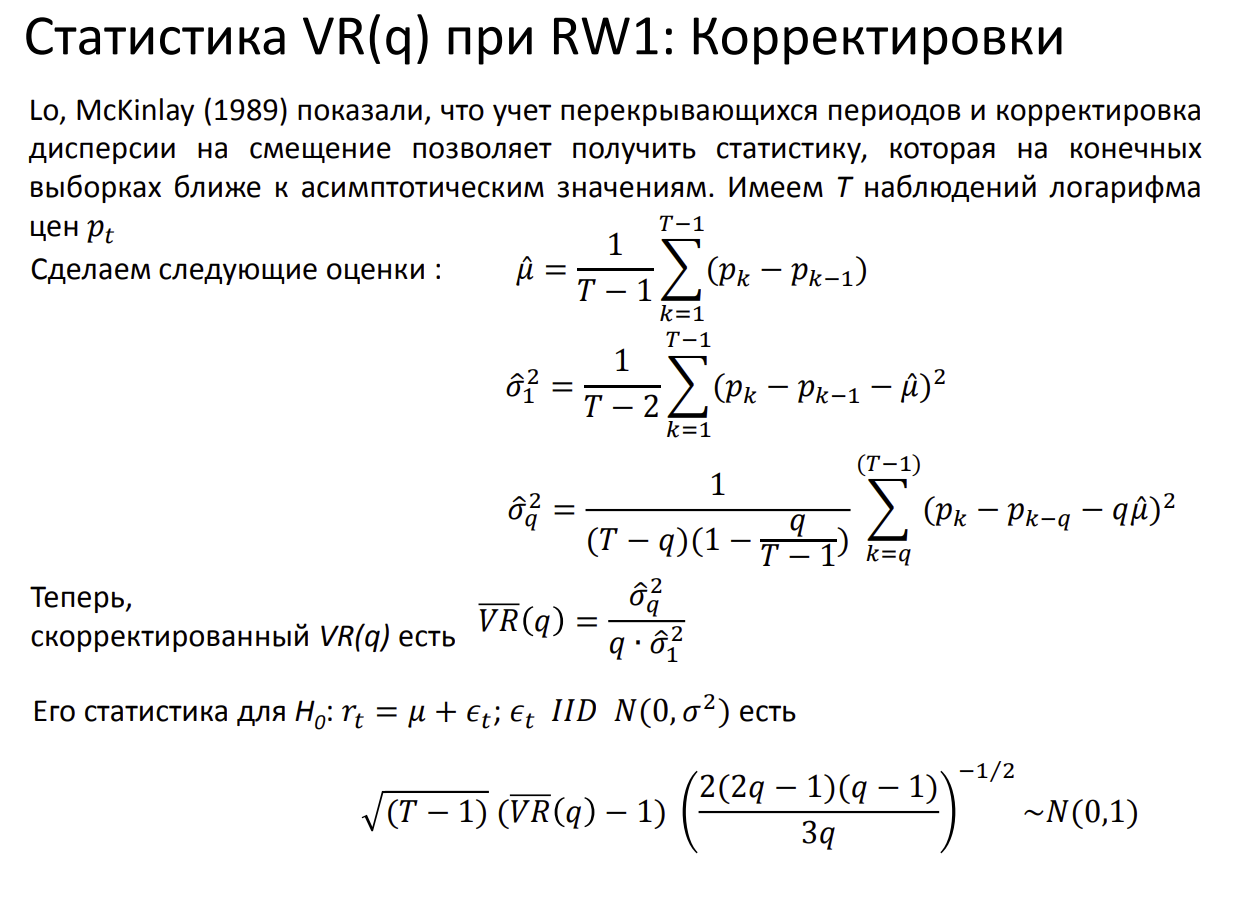

In [44]:
#illustration
from IPython.display import Image
Image("C:/Users/Kolya/Documents/New_studies/Quantitative Finance/HW/2/Formulas.png")

$\hat{\mu} = \frac{1}{T-1}\sum_{k=1}^{T-1} (p_k - p_{k-1})$

Example for the 1st company

In [45]:
Boeing = data_branches_7_log.iloc[0, :].values

In [46]:
T = 10 #a little more than a fifth
matrix_lags = {}

for ind in range(0, len(data_branches_7_log)):
    value = data_branches_7_log.iloc[ind, :].values
    index = data_branches_7_log.index[ind]
    L = []
    for lag in range(1, T):
        Li = []
        for number in range(lag, len(value)):
            Li.append(value[number] - value[number - lag])
        L.append(Li) #class method, len(x) - inner Pythod method
        
    b = np.zeros([len(L),len(max(L,key = lambda x: len(x)))])
    for i,j in enumerate(L):
        b[i][0:len(j)] = j
    
    matrix_lags.update({str(index): b})

In [47]:
Mu = []
for matrix in matrix_lags.values():
    Mu.append(matrix[0].mean())

$\hat{\sigma}_1^2 = \frac{1}{T-2}\sum_{k=1}^{T-1} (p_k - p_{k-1}- \hat{\mu})^2$

In [48]:
matrix_lags_sigma_1 = {}

for ind in range(0, len(data_branches_7_log)):
    value = data_branches_7_log.iloc[ind, :].values
    index = data_branches_7_log.index[ind]
    L = []
    for lag in range(1, T):
        Li = []
        for number in range(lag, len(value)):
            Li.append((value[number] - value[number - lag] - Mu[ind])**2)
        L.append(Li) #class method, len(x) - inner Pythod method
        
    b = np.zeros([len(L),len(max(L,key = lambda x: len(x)))])
    for i,j in enumerate(L):
        b[i][0:len(j)] = j
    
    matrix_lags_sigma_1.update({str(index): b})

In [49]:
sigma_1 = []
for matrix in matrix_lags_sigma_1.values():
    sigma_1.append(matrix[0].sum()/(len(matrix[0])-1))


In [50]:
Sigma_1_voc = dict(zip(matrix_lags_sigma_1.keys(), sigma_1))
# res = dict(zip(test_keys, test_values))

$\hat{\sigma}_q^2 = \frac{1}{(T-q)(1-\frac{q}{T-1})}\sum_{k=1}^{T-1} (p_k - p_{k-q}- q\hat{\mu})^2$

In [51]:
matrix_lags_sigma_list = {}

for ind in range(0, len(data_branches_7_log)):
    value = data_branches_7_log.iloc[ind, :].values
    index = data_branches_7_log.index[ind]
    L = []
    for lag in range(1, T):
        Li = []
        for number in range(lag, len(value)):
            Li.append((value[number] - value[number - lag] - lag*Mu[ind])**2/((T - lag)*(1 - lag/(T - 1))))
        L.append(Li) #class method, len(x) - inner Pythod method
        
    b = np.zeros([len(L),len(max(L,key = lambda x: len(x)))])
    for i,j in enumerate(L):
        b[i][0:len(j)] = j
    
    matrix_lags_sigma_list.update({str(index): b})

In [52]:
# matrix_lags_sigma_list

In [53]:
Sigma_voc = {}

In [54]:
for key in matrix_lags_sigma_list.keys():
    Sigma_list = []
    for lag in range(1, T-1): 
        Sigma_list.append(matrix_lags_sigma_list[key][lag].sum())
        
    Sigma_voc.update({key: Sigma_list})

In [55]:
Sigma_voc['71']

[4.933249973727004,
 4.375088832358641,
 4.362542107586657,
 7.723740179468512,
 6.438614956524489,
 2.9582283945787943e-31,
 0.0,
 0.0]

$\overline{VR}(q) = \frac{\hat{\sigma}^2_q}{q*\hat{\sigma}^2_1}$

In [56]:
Vr = {}
for key in Sigma_voc.keys():
    Vr_list = []
    for lag, sigma in enumerate (Sigma_voc[key]):
        Vr_list.append(sigma/(lag*Sigma_1_voc[key]))
    
    Vr.update({key: Vr_list})      

<ipython-input-56-5d13dc235f04>:5: RuntimeWarning: divide by zero encountered in double_scalars
  Vr_list.append(sigma/(lag*Sigma_1_voc[key]))


Confidence interval

$\overline{VR}(q) \sim 1 \pm \frac{\left(\frac{2(2q-1)(q-1)}{3q}\right)^{1/2}}{\sqrt{T-1}}N(0,1)$

In [57]:
Vr_h = {}
for key in Sigma_voc.keys():
    Vr_h_value = []
    for lag in range(2, len(Sigma_voc[key])+1):
        Vr_h_value.append(1 + 1/(T-1)**0.5/(2*(2*lag-1)*(lag-1)/3/lag)**(-0.5)*np.random.normal(0, 1))
        #1+1/($B$1-1)^0.5/(2*(2*E1-1)*(E1-1)/3/E1)^(-0.5)*НОРМСТОБР($B$5)
    Vr_h.update({key: Vr_h_value})

In [58]:
Vr_h['71']

[1.1709606120496148,
 0.8485996686534081,
 0.16985372161963708,
 1.6243639127105791,
 1.2604749415073666,
 1.279946391966162,
 -1.1857581745527752]

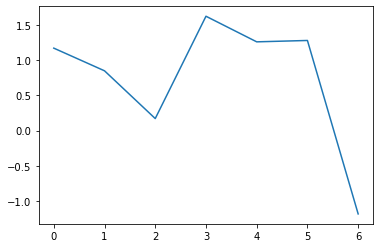

In [59]:
plt.plot(Vr_h['71'])

In [60]:
Vr_l = {}
for key in Sigma_voc.keys():
    Vr_l_value = []
    for lag in range(2, len(Sigma_voc[key])+1):
        Vr_l_value.append(1 + 1/(T-1)**0.5/(2*(2*lag-1)*(lag-1)/3/lag)**(-0.5)*np.random.normal(0, 1))
        #1+1/($B$1-1)^0.5/(2*(2*E1-1)*(E1-1)/3/E1)^(-0.5)*НОРМСТОБР($B$5)
    Vr_l.update({key: Vr_h_value})

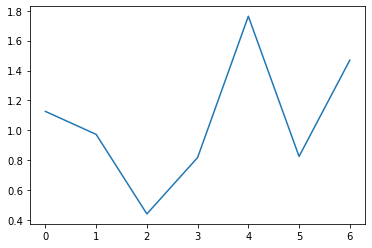

In [61]:
plt.plot(Vr_l['71'])

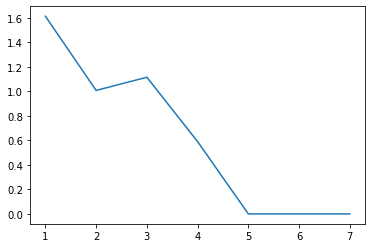

In [62]:
plt.plot(Vr['117']) #it all doesn't look good

In [63]:
Vr['117']

[inf,
 1.613298624948599,
 1.00787425307461,
 1.1152422547608951,
 0.5903246898118596,
 0.0,
 0.0,
 0.0]

Everything is bad. Unfortunately, couldn't use the code. There is a mistake somewhere.